<a href="https://colab.research.google.com/github/manojyamasani/DataScience_Projects/blob/main/05.%20Performance_metrics/Performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code here
maindata=pd.read_csv('5_a.csv')
data=maindata.copy()
data['proba']= list(map(lambda y: (0.0 if y<0.5 else 1.0), data['proba']))
print(len(data))

In [ ]:
cnf_matrix=np.zeros((2,2),dtype=int)
for i in range(2):
    for j in range(2):
        cnf_matrix[i,j]=len(data[(data['y']==float(j)) & (data['proba']==float(i))])
print(cnf_matrix)

[[    0     0]
 [  100 10000]]


**Precision** : It measures the proportion of true positive predictions among all positive predictions made by the model. In other words, it quantifies the accuracy of positive predictions made by the model.

Mathematically, precision is calculated as:


$$
Precision = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$



**Recall** :  Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. In other words, it quantifies the ability of the model to correctly identify all positive instances.


Mathematically, Recall is calculated as:


$$
Recall = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$



**Accuracy** : It measures the proportion of correctly classified instances out of the total instances in the dataset. Accuracy is calculated by dividing the number of correct predictions by the total number of predictions made by the model.

Mathematically, accuracy is represented as:
$$
Accuracy = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

If considered in terms of positives and negatives.

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{False Positives} + \text{True Negatives} + \text{False Negatives}}
$$

**In cases where classes are imbalanced (i.e., one class is much more prevalent than the others), accuracy may not accurately reflect the model's performance**. For instance, in a dataset where 95% of the instances belong to class A and only 5% belong to class B, a model that predicts all instances as class A would achieve 95% accuracy, even though it fails to correctly classify any instances of class B.

Therefore, in addition to accuracy, it's often recommended to use other evaluation metrics such as **precision, recall, F1 score, and area under the ROC curve (AUC-ROC) to get a more comprehensive understanding of the model's performance**, especially in real-world applications with complex data distributions.

**F1 Score** : It is particularly useful in situations where there is an imbalance between the classes or when both false positives and false negatives are important. The F1 score is the harmonic mean of precision and recall and is calculated as follows:

$$
 F1 \, score = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The F1 score ranges between 0 and 1, where a higher value indicates better model performance. It reaches its best value at 1 and worst value at 0.

The F1 score is useful when you want to seek a balance between precision and recall and when there is an uneven class distribution (class imbalance). It's commonly used in binary classification problems but can be extended to multi-class classification by averaging the F1 scores of each class (macro-F1, micro-F1, weighted F1, etc.).

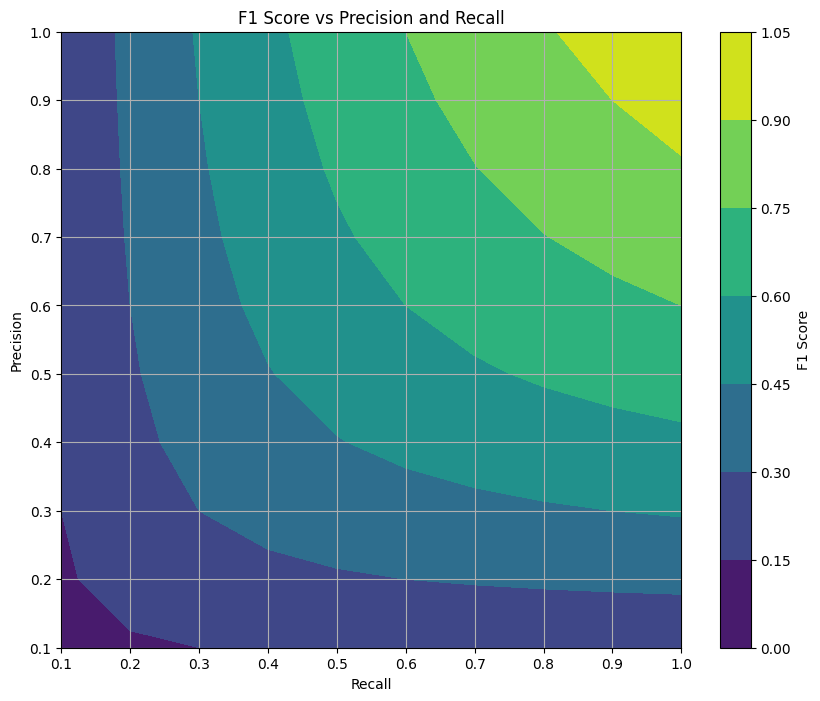

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate precision and recall values
precision_values = np.arange(0.1, 1.1, 0.1)
recall_values = np.arange(0.1, 1.1, 0.1)

# Calculate F1 scores
f1_scores = []
for precision in precision_values:
    for recall in recall_values:
        f1_score = 2 * precision * recall / (precision + recall)
        f1_scores.append(f1_score)

# Reshape F1 scores for plotting
f1_scores = np.array(f1_scores).reshape(len(precision_values), len(recall_values))

# Create a contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(recall_values, precision_values, f1_scores, cmap='viridis')
plt.colorbar(contour, label='F1 Score')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('F1 Score vs Precision and Recall')
plt.grid(True)
plt.show()


From the above plot we can observe that by only having both precision and recall as high values we get high $F1 \, score$.

In [ ]:
prec=cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
recal=cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
Accuracy=(np.trace(cnf_matrix)/(np.sum(cnf_matrix)))*100
F1=(2*prec*recal)/(prec+recal)

In [ ]:
print(' Precision :',prec,'\n','Recall    :',recal,'\n','Accuracy  :',Accuracy,'% \n','F1 score  :',F1,'\n')

 Precision : 0.9900990099009901 
 Recall    : 1.0 
 Accuracy  : 99.00990099009901 % 
 F1 score  : 0.9950248756218906 



In [ ]:
data2=maindata.copy()
data2=data2.drop_duplicates(subset='proba',keep='first')
data2=data2.sort_values('proba',ascending=True)
data2

,y,proba
5012,1.0,0.500019
805,1.0,0.500047
7421,1.0,0.500058
1630,1.0,0.500058
8294,1.0,0.500081
...,...,...
8324,1.0,0.899768
9592,1.0,0.899812
1028,1.0,0.899825
2099,1.0,0.899828


There are no duplicates in the above dataset as there is no change in size of data after removing the duplicates.

In [ ]:
def fptp(k,x1):
    x=x1.copy()
    x['proba']=list(map(lambda y: (0.0 if y<k else 1.0) , x['proba']))
    cnf_matrix=np.zeros((2,2),dtype=int)
    for i in range(2):
        for j in range(2):
            cnf_matrix[i,j]=len(x[(x['y']==float(j)) & (x['proba']==float(i))])
    tpr=(cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
    fpr=(cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[0,0]))
    return tpr,fpr

def calcfprtpr(x):
    T=x['proba']
    tpr_array=[]
    fpr_array=[]
    for i in T:
        tpr,fpr=fptp(i,x)
        tpr_array.append(tpr)
        fpr_array.append(fpr)

    return tpr_array,fpr_array

tpr_array,fpr_array=calcfprtpr(data2)
AUC = np.trapz(sorted(tpr_array), sorted(fpr_array))
print('Area under the curve, AUC is',AUC)

Area under the curve, AUC is 0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code
maindata=pd.read_csv('5_b.csv')
data=maindata.copy()
data['proba']= list(map(lambda y: (0.0 if y<0.5 else 1.0), data['proba']))

In [ ]:
cnf_matrix=np.zeros((2,2),dtype=int)
for i in range(2):
    for j in range(2):
        cnf_matrix[i,j]=len(data[(data['y']==float(j)) & (data['proba']==float(i))])
print(cnf_matrix)

[[9761   45]
 [ 239   55]]


In [ ]:
prec=cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
recal=cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
Accuracy=(np.trace(cnf_matrix)/(np.sum(cnf_matrix)))*100
F1=(2*prec*recal)/(prec+recal)

In [ ]:
print(' Precision :',prec,'\n','Recall    :',recal,'\n','Accuracy  :',Accuracy,'% \n','F1 score  :',F1,'\n')

 Precision : 0.1870748299319728 
 Recall    : 0.55 
 Accuracy  : 97.18811881188118 % 
 F1 score  : 0.2791878172588833 



In [ ]:
data2=maindata.copy()
data2=data2.drop_duplicates(subset='proba',keep='first')
data2=data2.sort_values('proba',ascending=True)
data2

,y,proba
313,0.0,0.100001
1938,0.0,0.100161
1360,0.0,0.100165
2532,0.0,0.100189
8290,0.0,0.100230
...,...,...
8578,1.0,0.588718
110,1.0,0.590171
1657,1.0,0.592198
1978,1.0,0.594808


There are no duplicates in the above dataset as there is no change in size of data after removing the duplicates.

In [ ]:
def fptp(k,x1):
    x=x1.copy()
    x['proba']=list(map(lambda y: (0.0 if y<k else 1.0) , x['proba']))
    cnf_matrix=np.zeros((2,2),dtype=int)
    for i in range(2):
        for j in range(2):
            cnf_matrix[i,j]=len(x[(x['y']==float(j)) & (x['proba']==float(i))])

    tpr=(cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
    fpr=(cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[0,0]))
    return tpr,fpr

def calcfprtpr(x):
    T=x['proba']
    tpr_array=[]
    fpr_array=[]
    for i in T:
        tpr,fpr=fptp(i,x)
        tpr_array.append(tpr)
        fpr_array.append(fpr)

    return tpr_array,fpr_array

tpr_array,fpr_array=calcfprtpr(data2)
AUC = np.trapz(sorted(tpr_array), sorted(fpr_array))
print('Area under the curve, AUC is',AUC)

Area under the curve, AUC is 0.9377570000000001


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
maindata=pd.read_csv('5_c.csv')
maindata

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
...,...,...
2847,1,0.491663
2848,1,0.292109
2849,1,0.659161
2850,1,0.456265


In [ ]:
ser=maindata.duplicated(subset='prob',keep='first')
ser[ser==True]

411     True
767     True
837     True
941     True
1053    True
        ... 
2818    True
2822    True
2837    True
2847    True
2851    True
Length: 61, dtype: bool

 We can observe that there are 61 duplicated values in the input data.

In [ ]:
data2=maindata.copy() # To create a copy of input data rather than just a reference.
data2=data2.drop_duplicates(subset='prob',keep='first')
data2=data2.sort_values('prob',ascending=True)
data2

,y,prob
473,0,0.028038
412,0,0.028396
454,0,0.028964
435,0,0.030269
468,0,0.031114
...,...,...
2456,1,0.941113
2788,1,0.944094
2447,1,0.948638
2548,1,0.951437


 After removing 61 duplicates from the input data, our output data size becomes 2791 x 2 (2852-61)

In [ ]:
ser=data2.duplicated(subset='prob',keep='first')
ser[ser==True]
# There are no dulicates in the data2

Series([], dtype: bool)

After removing duplicates, we can observe from the above code that there are no duplicates in the data2 dataframe.

In [ ]:
def fnfp(k,x1):
    x=x1.copy()
    x['prob']=list(map(lambda y: (0.0 if y<k else 1.0) , x['prob']))
    cnf_matrix=np.zeros((2,2),dtype=int)
    for i in range(2):
        for j in range(2):
            cnf_matrix[i,j]=len(x[(x['y']==float(j)) & (x['prob']==float(i))])
    fn=cnf_matrix[0,1]
    fp=cnf_matrix[1,0]
    A=((500*fn)+(100*fp))
    return A

def calcA(y):
    T=y['prob']
    data5=y.copy()
    A=[]
    for i in T:
        a=fnfp(i,data5)
        A.append(a)

    return T.iloc[A.index(min(A))]
threshold=calcA(data2)
print('The threshold value that gives the minimum A value is', threshold)


The threshold value that gives the minimum A value is 0.250403339798386


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
maindata=pd.read_csv('5_d.csv')
data4=maindata.copy()
n=len(data4)
print(n)

157200


In [ ]:
mean_y=sum(data4.y)/n
SSres=(sum((data4.y-data4.pred)**2))
SStot=sum((data4.y-mean_y)**2)
MSE=(SSres/n)
MAPE=(1/sum(data4.y))*(sum(abs(data4.y-data4.pred)))*100
R2=(1-(SSres/SStot))

In [ ]:
print(' MSE  : ',MSE,'\n','MAPE : ',MAPE,'\n','R^2  : ',R2)

 MSE  :  177.16569974554707 
 MAPE :  12.91202994009687 
 R^2  :  0.9563582786990964
